# Spherical Astronomy

 * In astronomy, the positions of stars are specified by directions on the sky, i.e. two angular coordinates. The radial distance of the star from Earth would be the third coordinate, but distances are not known for all astronomical objects.
 * As long as distances do not matter, all astronomical objects can be projected in radial directions onto a sphere with Earth at its center (the size of the sphere does not matter, but you can think of it as a distant spherical surface). This is the so-called celestial sphere.
 * For an observer on Earth, the position of astronomical objects depends on geo-graphical latitude and longitude and varies with the time of day.
 * To specify positions independent of the observer, angular coordinates with respect to fixed reference directions are used. In the equatorial coordinate system, one reference direction is given by Earth’s rotation axis (or, equivalently, the orientation of the equatorial plane). The orientation of the rotation axis is fixed because of angular momentum conservation.
 * The angular distance of a star from the equatorial plane is called **declination (dec)** and denoted by $\delta$. Declination is one of the two coordinates of the equatorial coordinate system. It is analogous to latitude on the Earth's surface, measuring the angular distance of an object north or south of the celestial equator.The other reference direction is defined by the intersection between the equatorial plane and the plane of Earth’s orbital motion around the Sun. The fixed orientation of the orbital plane, which is called ecliptic, is also a consequence of angular momentum conservation (in this case the angular momentum of orbital motion). The second coordinate in the equatorial system, which is called **right ascension (RA)** and its symbol is $\alpha$. It is analogous to longitude on Earth, measuring the angular distance of an object eastward along the celestial equator, is the angle measured from one of the two points where the celestial sphere is pierced by the line of intersection of the equatorial an orbital planes. The zero point for the right ascension is known as **vernal equinox**, the opposite point as **autumnal equinox**.

## Declination of the Sun

* While the declination of stars is constant, the position of the Sun changes in the equatorial system over the period of a year.
* This is a consequence of the inclination of Earth’s rotation axis with respect to the direction perpendicular to the ecliptic, which is equal to $\epsilon_{0} = 23.44^\circ$. The obliquity of the ecliptic ($\epsilon$) is the term used in astronomy for the angle between the plane of the Earth's orbit and the plane of the Earth's equator.
* The annual variation of the Sun's declination is a result of the Earth's axial tilt and its orbit around the Sun. The Sun's declination varies between $-23.44^\circ$ and $+23.44^\circ$ over the course of a year. This variation can be approximated by a sinusoidal function because the Earth's orbit is nearly circular and the axial tilt is relatively constant. The annual variation of the declination of the Sun is approximately given:
> $\delta_{SUN} = -23.44^\circ \times \cos\left(\frac{360}{365} \times (D + 10)\right)$

  where:

  $D$: the day of the year

  $-23.44^\circ$: minimum solar declination, which occurs at the solstices

  or we can use this formula:

  > $\delta_{SUN} = -\arcsin\left(\sin\left(23.44^\circ\right) \times \cos\left(\frac{360}{365.24} \times (N+10)\right)\right)$

  where:

  $N$: the difference in days starting from 1st January, so the first day of the year corresponds to $N=0$ and the last day to $N=364$.

  $\frac{360}{365.24}$: the fraction equals the change in the angular position of Earth per day, assuming a circular orbit, this is just the angular velocity ($\omega$) of Earth’s orbital motion around the Sun in units of degrees per day.
* The Sun has zero declination at the equinoxes (intersection points of celestial equator and ecliptic).



In [1]:
import math,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
earthAxialTilt = 23.44

In [3]:
def SunDeclinationFormula1(dayofyear:int)->int or float:
  declination = -earthAxialTilt*math.sin(math.radians((360/365.24)*(dayofyear-81)))
  return declination

In [4]:
# this formula should return a positive value, which is correct for the time near the summer solstice.
def SunDeclinationFormula2(dayofyear:int)->int or float:
  angularVelocity = 2*math.pi/365.24  # angular velocity in rad/day
  obliquity = math.radians(earthAxialTilt)
  declination = -math.asin(math.sin(obliquity)*math.cos(angularVelocity*(dayofyear+10)))
  return math.degrees(declination)

In [5]:
dayofyear = 171 # day of 1st solstice, around June 20th, close to the summer solstice
declinationResult1 = SunDeclinationFormula1(dayofyear)
declinationResult2 = SunDeclinationFormula2(dayofyear)
print(f"Declination Result-1: {declinationResult1}")
print(f"Declination Result-2: {declinationResult2}")

Declination Result-1: -23.434048110067284
Declination Result-2: 23.43035418879223


In [6]:
dayofyear = 2 # January 2nd.
declinationResult1 = SunDeclinationFormula1(dayofyear)
declinationResult2 = SunDeclinationFormula2(dayofyear)
print(f"Declination Result-1: {declinationResult1}")
print(f"Declination Result-2: {declinationResult2}")

Declination Result-1: 22.916371633940802
Declination Result-2: -22.91360189235458


In [7]:
# equinoxes and solstices in 2020
equinoxesAndSolsticesin2022 = np.array([79,171,265,355])

In [8]:
for day in equinoxesAndSolsticesin2022:
  print(f"Declination: {SunDeclinationFormula2(day)} for Day: {day}")

Declination: -0.9055076998096332 for Day: 79
Declination: 23.43035418879223 for Day: 171
Declination: -0.4195073085061084 for Day: 265
Declination: -23.439788273994935 for Day: 355


In [9]:
declinationValues = [SunDeclinationFormula2(day) for day in range(1,366)]

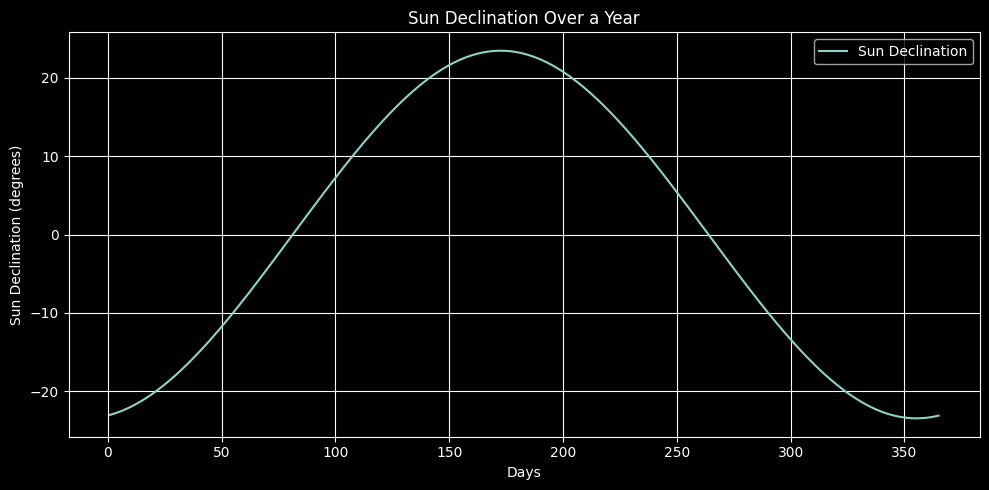

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(1,366),declinationValues,label="Sun Declination")
plt.xlabel("Days")
plt.ylabel("Sun Declination (degrees)")
plt.title("Sun Declination Over a Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Diurnal Arc

* From the viewpoint of an observer on Earth, the apparent motion of an object on the celestial sphere follows an arc above the horizon, which is called **diurnal arc**. The time-dependent horizontal position of the object is measured by its hour angle $h$.
*  For an observer at a given latitude on Earth, it's the angle through which a star (or any celestial object) appears to move above the horizon during the course of a night.
* The formula for the diurnal arc depends on the declination of the celestial object ($\delta$) and the latitude of the observer ($\phi$).
  > $\cos(H) = \frac{-\sin(h) + \sin(\phi) \sin(\delta)}{\cos(\phi) \cos(\delta)}$

  where:

  $\delta$: the declination of the object

  $\phi$: the latitude of the observer’s position on Earth

  $H$: is the hour angle at either rising or setting of the celestial object

  $h$: is the altitude of the celestial object at either rising or setting typically set to 0 for the object just on the horizon
* An hour angle of $24^{h}$ corresponds to a full circle of $360^\circ$ parallel to the celestial equator. This is because the celestial sphere appears to rotate $360^\circ$ around the Earth in 24 hours, corresponding to the Earth's rotation period. For this reason, $h$ is can be equivalently expressed in degrees or radians. By definition the hour angle is zero when the object reaches the highest altitude above the horizon. The hour angle corresponding to the setting time, when the object just vanishes beneath the horizon is given by:
  > $cos{h_{set}} = -tan{\delta} \times tan{\phi}$
  
  where:

  $\delta$: the declination of the object

  $\phi$: the latitude of the observer’s position on Earth
* One hour of time is equivalent to $15^\circ$ of rotation ($\frac{360^\circ}{24} = 15^\circ$)
* As a consequence, the variable $T = 2 \times h_{set}$ measures the so-called sidereal time for which the object is in principle visible on the sky (stars are of course outshined by the Sun during daytime).

In [11]:
%%capture
!pip install astropy

In [12]:
from astropy.coordinates import SkyCoord,EarthLocation
import astropy.units as u

In [13]:
# For example, let us consider the star Betelgeuse in the constellation of Orion.
# It is a red giant that is among the brightest stars on the sky.
betelgeuse = SkyCoord.from_name("betelgeuse")
print(f"Right Ascension of Betelgeuse:\n{betelgeuse.ra}")
print(f"Declination of Betelgeuse:\n{betelgeuse.dec}")

Right Ascension of Betelgeuse:
88.792938991 deg
Declination of Betelgeuse:
7.407063995 deg


**Translate as degrees (d), arc minutes (m) and arc seconds (s)**:

For example: 7.407063995

* Degrees (d): 7 (since 7.407063995 has a whole number part of 7)
* Arc Minutes (m):
  - Decimal part is 0.407063995.
  - Multiply this by 60: $0.407063995 \times 60 = 24.4238397$
  - The whole number part is 24 arc minutes.
* Arc Seconds (s):
  - The decimal part of arc minutes is approximately 0.4238397.
  - Multiply this by 60: $0.4238397 \times 60 = 25.43$
  - Approximately 25.43 arc seconds.
So, **7.407063995 degrees** can be expressed as **7 degrees,24 arc minutes,25.43 arc seconds**, or "$07^\circ$ $24^{'}$ $25^{''}$".

In [14]:
# In addition to the star’s declination, we need the position of the observer.
observerCoordinate = EarthLocation(
    lat=53*u.deg+28*u.arcmin+49*u.arcsec,
    lon=10*u.deg+14*u.arcmin+23*u.arcsec
) # Hamburg Observatory
print(f"Observer Coordinate: {observerCoordinate}")
print(f"Observer Latitude: {observerCoordinate.lat}")
print(f"Observer Longitude: {observerCoordinate.lon}")

Observer Coordinate: (3743272.38675498, 676200.50846503, 5102531.52113739) m
Observer Latitude: 53.48027777777777 deg
Observer Longitude: 10.239722222222222 deg


In [15]:
def DiurnalArc(latitude:int or float,declination:int or float)->int or float:
  """
    Calculate the diurnal arc for a given latitude and declination.

    Parameters:
    latitude (float): The observer's latitude in degrees.
    declination (float): The declination of the celestial object in degrees.

    Returns:
    float: The diurnal arc in degrees, or None if the object never rises or sets.
  """
  # Convert latitude and declination to radians
  latRad = math.radians(latitude)
  decRad = math.radians(declination)
  try:
    cosH = (-math.sin(0)+math.sin(latRad)*math.sin(decRad))/(math.cos(latRad)*math.cos(decRad))
    # If cos_h is outside the range -1 to 1, the object never rises or sets
    if (cosH < -1) or (cosH > 1):
      return None
    # Calculate the hour angle in degrees
    Hvalue = math.degrees(math.acos(cosH))
    # The diurnal arc is twice the hour angle (from rising to setting)
    return 2*Hvalue
  except ValueError:
    # This occurs if the math.acos() function receives an input outside its domain [-1, 1]
    # Which means the object is circumpolar (always above the horizon) or never rises
    raise None

In [16]:
def HourAngleAtSet(latitude:int or float,declination:int or float)->int or float:
  """
    Calculate the hour angle at the setting time of a celestial object.

    Parameters:
    latitude (float): The observer's latitude in degrees.
    declination (float): The declination of the celestial object in degrees.

    Returns:
    float: The hour angle at set time in degrees, or None if the object doesn't set.
  """
  # Convert latitude and declination to radians
  latRad = math.radians(latitude)
  decRad = math.radians(declination)
  try:
    tanDec = math.tan(decRad)
    tanLat = math.tan(latRad)
    cosHSet = -tanDec*tanLat
    # If cos_h_set is outside the range -1 to 1, the object never sets
    if cosHSet < -1 or cosHSet > 1:
      return None
    # Calculate the hour angle in degrees
    hSet = math.degrees(math.acos(cosHSet))
    return hSet
  except ValueError:
    # This occurs if the math.acos() function receives an input outside its domain [-1, 1]
    # Which means the object is circumpolar (always above the horizon) or never sets
    return None

In [17]:
h = math.acos(-math.tan(betelgeuse.dec.radian) * math.tan(observerCoordinate.lat.radian))
print(h)
T = (math.degrees(2*h)/360)*u.sday
print("T = {:.2f}".format(T.to(u.h)))

1.7472730763094302
T = 13.31 h


In [18]:
def DegreeToHour(degree:int or float)->int or float:
  """
    Convert degrees to hours.

    Parameters:
    degrees (float): Angle in degrees.

    Returns:
    float: Equivalent angle in hours.
  """
  return degree/15

In [19]:
decBetelgeuse = betelgeuse.dec.to_value() #delta
latObserver = observerCoordinate.lat.to_value() #phi
hSet = HourAngleAtSet(latitude=latObserver,declination=decBetelgeuse)
dArc = DiurnalArc(latitude=latObserver,declination=decBetelgeuse)
print(f"Hour Angle in Degree for Betelgeuse on Hamburg Observatory: {hSet} deg or Hour: {DegreeToHour(hSet*2)} h")
print(f"Diurnal-Arc for Betelgeuse on Hamburg Observatory: {dArc} deg or Hour: {DegreeToHour(dArc*2)} h")

Hour Angle in Degree for Betelgeuse on Hamburg Observatory: 100.11137292937018 deg or Hour: 13.348183057249356 h
Diurnal-Arc for Betelgeuse on Hamburg Observatory: 159.77725414125965 deg or Hour: 21.303633885501288 h


In [20]:
def HourAngleOtherMethod(latitude:u,declination:u)->int or float:
  hSet = math.acos(-math.tan(declination.radian)*math.tan(latitude.radian))
  # By doubling this angle, you effectively calculate the total angular distance the object travels in the sky from rising to setting
  degreeHSet = (math.degrees(2*hSet)/360)*u.sday # in sidereal days, calculates the time duration (in hours) that the object is above the horizon
  return degreeHSet.to(u.h) # hour

In [21]:
hSet = HourAngleOtherMethod(latitude=observerCoordinate.lat,declination=betelgeuse.dec)
print(f"Betelgeuse could be seen : {hSet} at the Observatory")

Betelgeuse could be seen : 13.311736728655621 h at the Observatory


**if it were not for the Sun, Betelgeuse could be seen 13 h at the Observatory**

### Day Length Example

In [22]:
days = np.arange(365)
angularVelocityofEarth = 2*math.pi/365.24
obliquity = math.radians(23.44)
declinationsOfSun = -np.arcsin(math.sin(obliquity)*np.cos(angularVelocityofEarth*(days+10))) # delta, declination of the Sun for all days of the year

In [23]:
dayLengths = np.arccos(-np.tan(declinationsOfSun)*math.tan(observerCoordinate.lat.radian)) # depends on Hamburg Observatory
hSets = (np.degrees(2*dayLengths)/360)*u.sday.to(u.h)

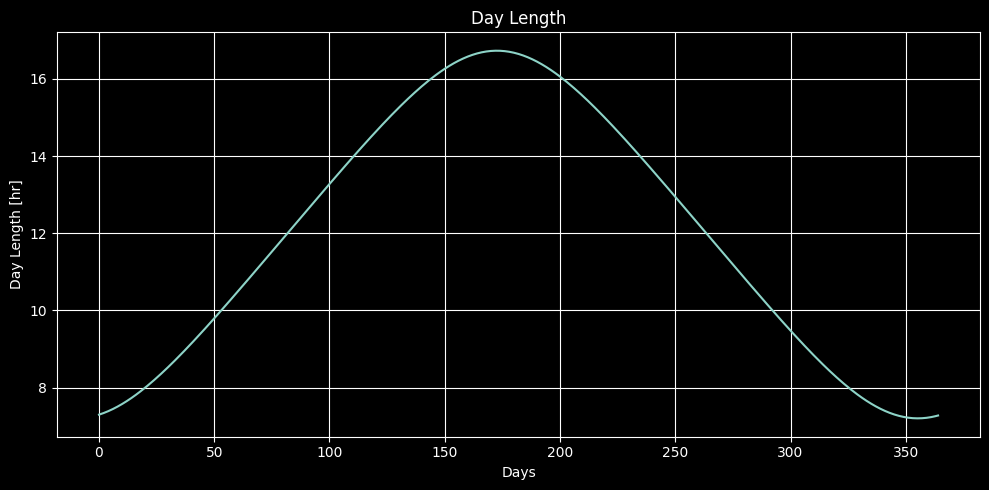

In [24]:
plt.figure(figsize=(10,5))
plt.plot(days,hSets)
plt.title("Day Length")
plt.xlabel("Days")
plt.ylabel("Day Length [hr]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
print(f"Minimum Day Length: {hSets.min()} hours")
print(f"Maximum Day Length: {hSets.max()} hours")

Minimum Day Length: 7.201786110785734 hours
Maximum Day Length: 16.732599523096972 hours


**The difference between minimal and maximal day length increases with latitude**

that the range of the declination of the
Sun is: $-\epsilon_{0} \leq \delta_{SUN} \leq \epsilon_{0}$,

this corresponds to the polar night or polar day during which the Sun never rises or sets

In [26]:
newyorkCoordinateLat = 40+43/60 # deg
bangkokCoordinateLat = 13+45/60 # deg
ankaraCoordinateLat = 39+56/60 # deg

In [27]:
coordinates = {"NewYork":math.radians(newyorkCoordinateLat),
               "Bangkok": math.radians(bangkokCoordinateLat),
               "Ankara":math.radians(ankaraCoordinateLat)}

In [28]:
coordinates["Hamburg"] = observerCoordinate.lat.radian

In [29]:
for city,coorLat in coordinates.items():
  print(f"Degree of {city} is {math.degrees(coorLat)} deg - As radian: {coorLat} rad")

Degree of NewYork is 40.71666666666667 deg - As radian: 0.7106398937703579 rad
Degree of Bangkok is 13.75 deg - As radian: 0.2399827721492203 rad
Degree of Ankara is 39.93333333333333 deg - As radian: 0.6969681479630688 rad
Degree of Hamburg is 53.48027777777777 deg - As radian: 0.9334069321033784 rad


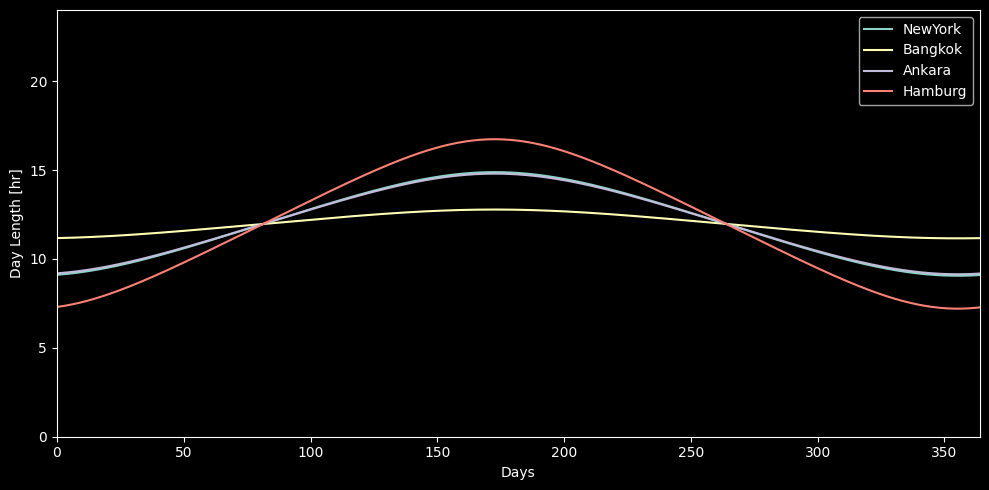

In [30]:
plt.figure(figsize=(10,5))
for city,coorLat in coordinates.items():
  hSets = np.arccos(np.clip(-np.tan(declinationsOfSun)*math.tan(coorLat),-1.0,1.0))
  dayLengths = (np.degrees(2*hSets/360))*u.sday.to(u.h)
  plt.plot(days,dayLengths,label=city)
plt.xlabel("Days")
plt.ylabel("Day Length [hr]")
plt.xlim(0,364)
plt.ylim(0,24)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

**in Bangkok, which is in the tropics, experience a day length around 12 h over the whole year**

## Observation of Celestial Objects

* While it is important to be able to specify the positions of celestial objects in a coordinate system that is independent of time and the observer’s location, at the end of the day you want to know where on the sky you can find the object. To that end, the so-called horizontal coordinate system is used, which is based on an imaginary plane that is oriented tangential to the surface of Earth at the location of the observer.
* The angular position measured in normal direction from the horizon is the **altitude** $a$ and the angular separation from some reference direction (usually, the North direction) parallel to the horizon is the **azimuth** of the object. Azimuth is a common term in astronomy and navigation that refers to the angle between the direction of a celestial object and the direction of north, measured along the horizon. The azimuth measured from North corresponds to the compass direction. This is why the horizontal system also goes under the name of **alt-azimuth system**.
* Imagine you are standing outside and looking at the sky. If you look directly towards the north, the azimuth of the point on the horizon you're looking at is 0 degrees. If you turn to your right and face east, you're now looking at a point on the horizon with an azimuth of 90 degrees. If you continue turning to face south, the azimuth is 180 degrees, and if you face west, it's 270 degrees. For instance, if you're observing the Sun at a certain time and location, and it's located due south from your position, it would have an azimuth of approximately 180 degrees. If it's rising and you're facing it, its azimuth is approximately 90 degrees (east).

In [36]:
import astropy.units as u
from astropy.coordinates import SkyCoord,EarthLocation,AltAz,get_sun
from astropy.time import Time # By default, sets the coordinated universal time (UTC).
import numpy as np

In [32]:
observerLocation = EarthLocation(
    lat=53*u.deg+28*u.arcmin+49*u.arcsec,
    lon=10*u.deg+14*u.arcmin+23*u.arcsec
)

In [33]:
observerLat = observerLocation.lat # phi
observerLon = observerLocation.lon
print(f"Observer Latitude: {observerLat}")
print(f"Observer Longitude: {observerLon}")

Observer Latitude: 53.48027777777777 deg
Observer Longitude: 10.239722222222222 deg


In [35]:
# CEST stands for Central European Summer Time.
utcShift = 2*u.hour # CEST time zone (+2h)
noonCEST = Time("2020-07-31 12:00:00")-utcShift
print(f"Noon Time for CEST: {noonCEST}")

Noon Time for CEST: 2020-07-31 10:00:00.000


In [ ]:
# Since altitude and azimuth are time dependent, we need to create a sequence of frames covering a whole day
# The coordinated universal time (UTC) is an international standard for time.
elapsed = np.arange(0,24*60,5)*u.min
time = noonCEST+elapsed

In [ ]:
# sequence of horizontal frames
frameLocal24h = AltAz(obstime=time,location=observerLocation)

In [41]:
aldebaran = SkyCoord.from_name("aldebaran")

In [45]:
decAldebaran = aldebaran.dec
raAldebaran = aldebaran.ra
print(f"Declination of Aldebaran: {decAldebaran}")
print(f"Right Ascension of Aldebara: {raAldebaran}")

Declination of Aldebaran: 16.509302351 deg
Right Ascension of Aldebara: 68.98016279 deg


In [46]:
# turns the declination and right ascension of the star into altitudes and azimuths for the time sequence of frames
# Modern telescopes are controlled by software, making it relatively easy for the observer to direct a telescope to a specific celestial object
aldebaranLocal = aldebaran.transform_to(frameLocal24h)

In [49]:
# time-dependent coordinates of the Sun in equatorial system
sun = get_sun(time)
sunLocal = sun.transform_to(frameLocal24h)

In [53]:
elapsedNight = elapsed[np.where(sunLocal.alt<0)]
aldebaranNight = aldebaranLocal.alt[np.where(sunLocal.alt<0)]

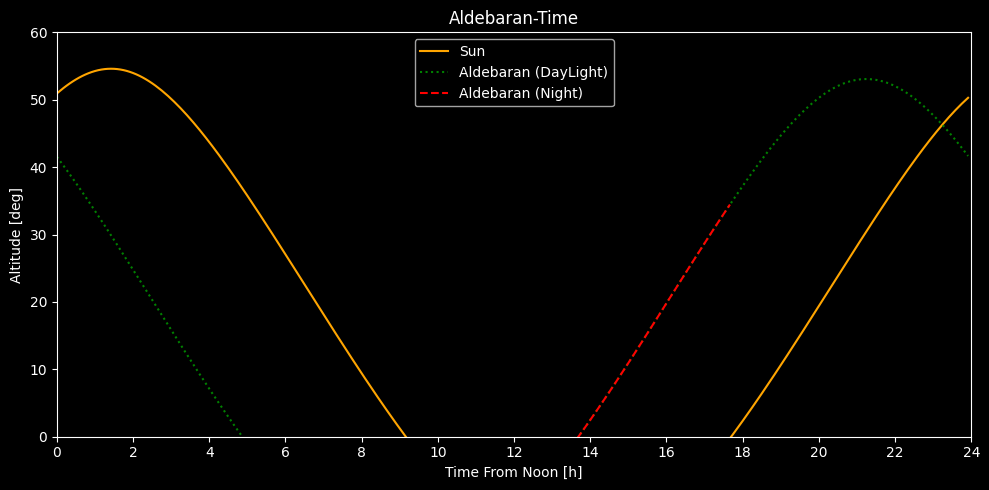

In [57]:
plt.figure(figsize=(10,5))
plt.title("Aldebaran-Time")
plt.plot(elapsed.to(u.h),sunLocal.alt,color="orange",label="Sun")
plt.plot(elapsed.to(u.h),aldebaranLocal.alt,color="green",label="Aldebaran (DayLight)",linestyle=":")
plt.plot(elapsedNight.to(u.h),aldebaranNight,color="red",label="Aldebaran (Night)",linestyle="--")
plt.xlabel("Time From Noon [h]")
plt.ylabel("Altitude [deg]")
plt.xlim(0,24)
plt.ylim(0,60)
plt.xticks(np.arange(13)*2)
plt.legend(loc="upper center")
plt.tight_layout()
plt.show()

**Since objects with negative altitude are invisible for the observer, only positive values are shown**

In [63]:
def CalculateAltAz(observerLocation:tuple,objectCoordinate:tuple,observationTime:str)->tuple:
  location = EarthLocation(
      lat=observerLocation[0]*u.deg,
      lon = observerLocation[1]*u.deg
  )
  time = Time(observationTime)
  skyCoord = SkyCoord(
      ra=objectCoordinate[0]*u.deg,
      dec=objectCoordinate[1]*u.deg,
      frame="icrs"
  )
  altAz = AltAz(obstime=time,location=location)
  altAzCoordinate = skyCoord.transform_to(altAz)
  altitude = altAzCoordinate.alt.deg # degree
  azimuth = altAzCoordinate.az.deg # degree
  return (altitude,azimuth)

In [59]:
polarisCoordinate = SkyCoord.from_name("polaris")
print(f"Polaris RA: {polarisCoordinate.ra}")
print(f"Polaris DEC: {polarisCoordinate.dec}")

Polaris RA: 37.946143 deg
Polaris DEC: 89.264138 deg


In [60]:
newyorkCoord = (40.7128,-74.0060)

In [61]:
observationTime = "2023-12-09 12:00:00"

In [64]:
altitude,azimuth = CalculateAltAz(observerLocation=newyorkCoord,
                                  objectCoordinate=(polarisCoordinate.ra.to_value(),
                                                    polarisCoordinate.dec.to_value()),
                                  observationTime=observationTime)

In [66]:
print(f"Altitude of Polaris for {observationTime}: {altitude} deg")
print(f"Azimuth of Polaris for {observationTime}: {azimuth} deg")

Altitude of Polaris for 2023-12-09 12:00:00: 40.24138987130087 deg
Azimuth of Polaris for 2023-12-09 12:00:00: 359.44648245374805 deg
